### Task 1 

In [2]:
import pandas as pd

In [11]:
import statistics as st

In [12]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("DS1_C4_S7_Students_Scores_Data_Practice.csv")
df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [14]:
Mean=[]
Median=[]
Mode=[]


for col in df:
    Mean.append(df.loc[:,col].mean()) 
    Median.append(df.loc[:,col].median()) 
    Mode.append(st.mode(df[col])) 
    
row_head=['Mean','Median','Mode']
col_names=['Statistics','Python','Tableau']


data=pd.DataFrame([Mean, Median, Mode],columns=col_names)


data.insert(0, "Measures", row_head, True)

data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


Interprpetation - The students are well performed in the python subject than other two

### Task 2 

In [15]:
Mean=[]
SD=[]
CV=[]

for col in df.head():
    col_mean=df.loc[:,col].mean()  
    Mean.append(col_mean) 
    col_sd=df.loc[:,col].std() 
    SD.append(col_sd) 
    CV.append(col_sd/col_mean*100)  
row_head=['Mean','Standard Deviation','Coefficient of Variation']
col_names=['Statistics','Python','Tableau']

data=pd.DataFrame([Mean, SD, CV],columns=col_names)

data.insert(0, "Measures", row_head, True)
data

,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Standard Deviation,7.236126,4.345484,7.320899
2,Coefficient of Variation,11.883931,5.309731,10.762862


Interpretation - Here , python shows the best performance of the class

### Task 3 

In [16]:
for student in df.head():
    LO=[]
    UO=[]
    student_series=pd.Series(df[student]) 
    
    Min=min(student_series) 
    Max=max(student_series) 
    Range=Max-Min 
    
    Q1=student_series.quantile(0.25) 
    Q3=student_series.quantile(0.75) 
    IQR=Q3-Q1 
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR 
    
    # The rule of 1.5 * IQR 
    # (IQR*1.5) = k 
    # Any point beyond Q3+k is an outlier 
    # Any point beyond Q1-k is an outlier 
    for i in df[student]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    
    #Storing all above the calculated minimum, maximum, range, Q1, Q3, IQR, 
    #upper fence, lower fence, and outliers into respective lists
    if(student=="Statistics"):
        Statistics=['Statistics',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(student=="Python"):
        Python=['Python',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        
        Tableau=['Tableau',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['student','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']

data=pd.DataFrame([Statistics,Python ,Tableau],columns=col_names) 
data

,student,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
0,Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,66.000,98.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125,"[[45, 50, 50, 50, 46, 46], []]"


Interpretation -  Here the Tablue subject is more skewed 

### Task 4 

In [17]:
Statistics_data=df['Statistics'].tolist()
Python_data=df['Python'].tolist()
Tableau_data=df['Tableau'].tolist()

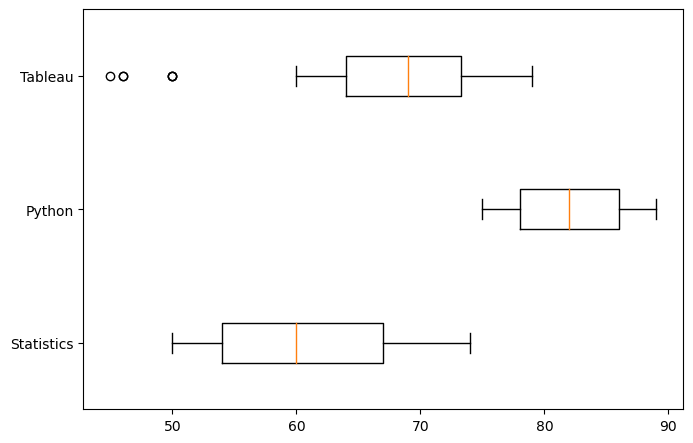

In [18]:
fig = plt.figure(figsize =(6, 4))

ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([Statistics_data,Python_data,Tableau_data],vert=0)

ax.set_yticklabels(['Statistics', 'Python','Tableau'])

plt.show()

Interpretation - here i have present the data with the box plot , Tablue score is more skewed

### Task - 5 

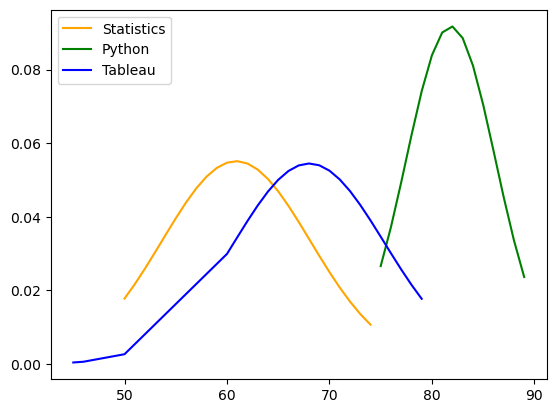

In [20]:
from scipy.stats import norm

Statistics_data=sorted(Statistics_data)
Python_data=sorted(Python_data)
Tableau_data=sorted(Tableau_data)

S_mean = st.mean(Statistics_data)
S_sd = st.stdev(Statistics_data)
P_mean = st.mean(Python_data)
P_sd = st.stdev(Python_data)
T_mean = st.mean(Tableau_data)
T_sd = st.stdev(Tableau_data)

#Drawing plots using sorted data and normalized data
plt.plot(Statistics_data, norm.pdf(Statistics_data, S_mean, S_sd), color='orange', label='Statistics')
plt.plot(Python_data, norm.pdf(Python_data, P_mean, P_sd),color='green', label='Python')
plt.plot(Tableau_data, norm.pdf(Tableau_data, T_mean, T_sd), color='blue', label='Tableau')

#Attaching legend
plt.legend()

#Showing the final plot
plt.show()

In [21]:
from scipy.stats import kurtosis 

print("Kurtosis of 25 samples of statistics subject",kurtosis(Statistics_data))
print("Kurtosis of 25 samples of Python subject",kurtosis(Python_data))
print("Kurtosis of 25 samples of Tablue subject",kurtosis(Tableau_data))

Kurtosis of 25 samples of statistics subject -1.2890343729055107
Kurtosis of 25 samples of Python subject -1.2748529079288784
Kurtosis of 25 samples of Tablue subject 1.442459054422362


interpretation - Here i have displayed the distribution of data for each subject and the kurtosis analysis for each subject